In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df = pd.read_csv("311-2014.csv", nrows=200000)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 53 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                      177

In [4]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['created_dt'] = df['Created Date'].apply(parse_date)
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29


In [53]:
df.index = df['created_dt']
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29


What was the **most popular type of complaint**, and how many times was it filed?

In [8]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(3)

Blocked Driveway    21779
Illegal Parking     19837
HEAT/HOT WATER      12408
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

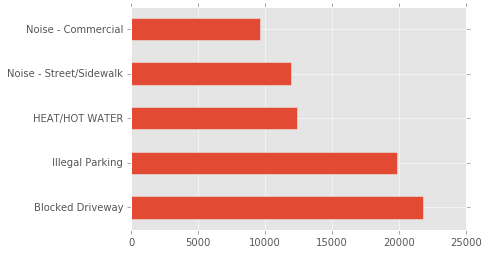

In [12]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh')

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [13]:
df['Borough'].value_counts()

BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Borough, dtype: int64

In [19]:
print("Brooklyn is", 57129 / 2592000, "per person")
print("Queens is", 46824 / 2296000, "per person")
print("Manhattan is", 42050 / 1626000, "per person")
print("Bronx is", 29610 / 1419000, "per person")
print("Staten Island is", 7387 / 472000, "per person")
# BROOKLYN!

Brooklyn is 0.02204050925925926 per person
Queens is 0.020393728222996517 per person
Manhattan is 0.0258610086100861 per person
Bronx is 0.020866807610993656 per person
Staten Island is 0.015650423728813558 per person


According to your selection of data, **how many cases were filed in March?** How about May?

In [21]:
len(df["2015-03"])

15025

In [22]:
len(df["2015-05"])

49715

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [23]:
len(df["2015-04-01"])

573

What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [24]:
df["2015-04-01"]["Complaint Type"].value_counts().sort_values(ascending=False).head(3)

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200000 entries, 2015-07-06 10:58:27 to 2015-06-09 12:48:25
Data columns (total 54 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Add

**What month has the most reports filed?** How many? Graph it.

In [61]:
# I'm doing this both by resample and by groupby

In [62]:
df.resample('M').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-01-31,7091,7091,6583,7091,7091,7091,7051,6547,6418,5308,...,76,75,75,7,2,8,6181,6181,6181,7091
2015-02-28,8141,8141,7631,8141,8141,8141,8100,7508,7515,6097,...,121,121,121,18,4,17,7274,7274,7274,8141
2015-03-31,15025,15025,14305,15025,15025,15025,14931,13742,13833,10775,...,704,702,702,20,10,22,13444,13444,13444,15025
2015-04-30,20087,20087,19131,20087,20087,20087,19921,17250,17292,13809,...,311,307,346,15,9,18,16692,16692,16692,20087
2015-05-31,49715,49715,47090,49715,49715,49715,49287,42564,42611,36206,...,303,301,393,33,17,45,41381,41381,41381,49715
2015-06-30,14459,14459,13416,14459,14459,14459,14341,12274,12474,10460,...,83,81,99,16,5,18,12067,12067,12067,14459
2015-07-31,15047,15047,13908,15047,15047,15047,14789,14121,14395,11430,...,75,74,74,13,11,26,13864,13864,13864,15047
2015-08-31,12204,12204,11408,12204,12204,12204,12022,11266,11753,9556,...,53,52,52,12,12,18,11336,11336,11336,12204
2015-09-30,13679,13679,12911,13679,13679,13679,13492,12790,13024,10769,...,78,78,85,3,4,10,12551,12551,12551,13679


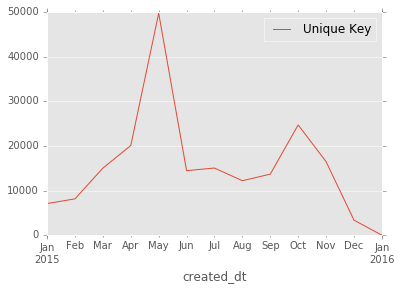

In [63]:
df.resample('M').count().plot(y='Unique Key')

In [64]:
# This is real big, should just look at unique key
#df.groupby(by=df.index.month).count()
df.groupby(by=df.index.month)['Unique Key'].count().sort_values(ascending=False)

5     49715
10    24700
4     20087
11    16476
7     15047
3     15025
6     14459
9     13679
8     12204
2      8141
1      7094
12     3373
Name: Unique Key, dtype: int64

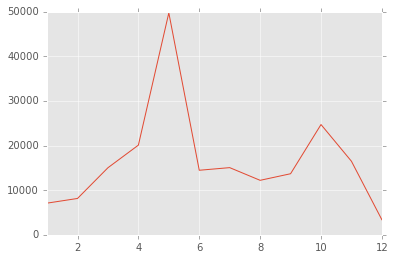

In [65]:
# It's May!
df.groupby(by=df.index.month)['Unique Key'].count().plot()

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [66]:
df.resample('W')['Unique Key'].count().sort_values(ascending=False).head(3)

created_dt
2015-05-10    13559
2015-05-17    11683
2015-05-24    10351
Name: Unique Key, dtype: int64

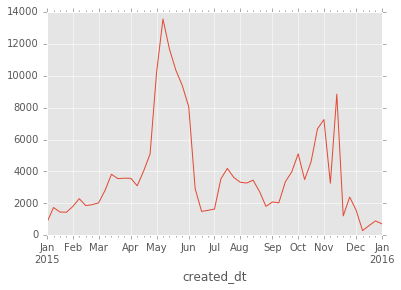

In [67]:
# All of these do the same thing, but the last one is fastest because it's only resampling one column
#df.resample('W').count().plot(y='Unique Key')
#df.resample('W')['Unique Key'].count().plot()
df['Unique Key'].resample('W').count().plot()

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [36]:
noise_df = df[df["Complaint Type"].str.contains("Noise")]
len(noise_df)

27824

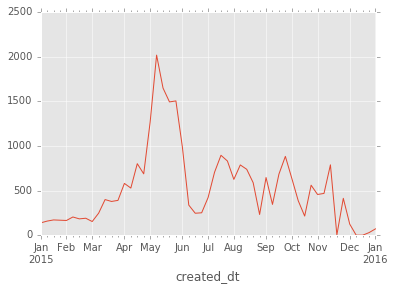

In [37]:
noise_df['Unique Key'].resample('W').count().plot()

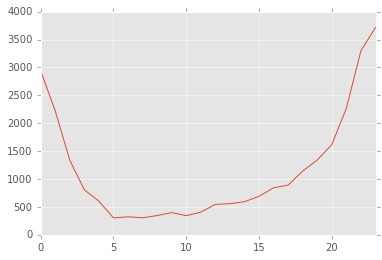

In [38]:
# By hour of the day
# need to make sure you do by=noise_df.index.hour
# otherwise if you do df.index.house your'e sending it FAR too many groups
noise_df['Unique Key'].groupby(by=noise_df.index.hour).count().plot()

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [39]:
df['Unique Key'].resample('D').count().sort_values(ascending=False).head(5)

created_dt
2015-10-28    2697
2015-11-09    2529
2015-05-04    2465
2015-05-11    2293
2015-10-29    2258
Name: Unique Key, dtype: int64

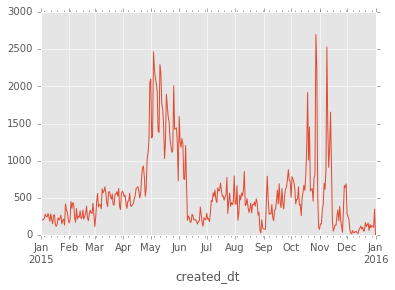

In [40]:
df['Unique Key'].resample('D').count().plot()

**What hour of the day are the most complaints?** Graph a day of complaints.

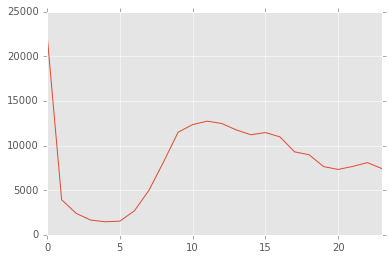

In [42]:
df['Unique Key'].groupby(by=df.index.hour).count().plot()

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [43]:
midnight_df = df[df.index.hour == 0]
midnight_df['Complaint Type'].value_counts().sort_values(ascending=False).head(3)

HEAT/HOT WATER    4534
Rodent            2112
PAINT/PLASTER     1946
Name: Complaint Type, dtype: int64

In [44]:
one_am_df = df[df.index.hour == 1]
one_am_df['Complaint Type'].value_counts().sort_values(ascending=False).head(3)

Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Name: Complaint Type, dtype: int64

In [45]:
eleven_pm_df = df[df.index.hour == 1]
eleven_pm_df['Complaint Type'].value_counts().sort_values(ascending=False).head(3)

Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [46]:
# Get midnight
midnight_df = df[df.index.hour == 0]
# And group it on a per-minute basis
midnight_df.groupby(by=midnight_df.index.minute).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
0,17116,17116,16721,17116,17116,17116,17116,17098,17098,16983,...,0,0,0,0,0,0,17093,17093,17093,17116
1,109,109,108,109,109,109,109,105,103,90,...,0,0,0,0,0,0,102,102,102,109
2,91,91,88,91,91,91,90,81,88,72,...,0,0,1,0,0,0,87,87,87,91
3,99,99,97,99,99,99,99,94,96,83,...,1,1,1,0,0,0,95,95,95,99
4,106,106,103,106,106,106,105,101,103,93,...,1,1,1,0,0,0,103,103,103,106
5,94,94,91,94,94,94,93,89,90,80,...,0,0,0,1,0,0,88,88,88,94
6,106,106,103,106,106,106,105,101,101,90,...,2,2,2,0,0,0,101,101,101,106
7,106,106,103,106,106,106,106,101,102,90,...,1,1,2,0,0,0,102,102,102,106
8,95,95,94,95,95,95,95,92,92,80,...,1,1,1,0,0,0,90,90,90,95
9,82,82,80,82,82,82,81,80,78,71,...,1,1,1,0,0,0,77,77,77,82


Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [48]:
df['Agency'].value_counts().head(5)

NYPD     80000
HPD      39388
DOT      22308
DPR      15505
DOHMH     8250
Name: Agency, dtype: int64

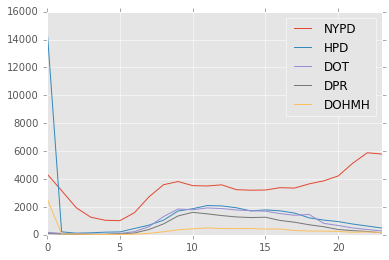

In [70]:
nypd_df = df[df['Agency'] == 'NYPD']
hpd_df = df[df['Agency'] == 'HPD']
dot_df = df[df['Agency'] == 'DOT']
dpr_df = df[df['Agency'] == 'DPR']
dohmh_df = df[df['Agency'] == 'DOHMH']


ax = nypd_df.groupby(by=nypd_df.index.hour).count().plot(y='Unique Key', label='NYPD')
hpd_df.groupby(by=hpd_df.index.hour).count().plot(y='Unique Key', label='HPD', ax=ax)
dot_df.groupby(by=dot_df.index.hour).count().plot(y='Unique Key', label='DOT', ax=ax)
dpr_df.groupby(by=dpr_df.index.hour).count().plot(y='Unique Key', label='DPR', ax=ax)
dohmh_df.groupby(by=dohmh_df.index.hour).count().plot(y='Unique Key', label='DOHMH', ax=ax)

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

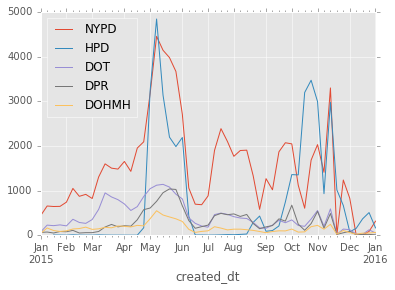

In [75]:
nypd_df = df[df['Agency'] == 'NYPD']
hpd_df = df[df['Agency'] == 'HPD']
dot_df = df[df['Agency'] == 'DOT']
dpr_df = df[df['Agency'] == 'DPR']
dohmh_df = df[df['Agency'] == 'DOHMH']

ax = nypd_df.resample('W').count().plot(y='Unique Key', label='NYPD')
hpd_df.resample('W').count().plot(y='Unique Key', ax=ax, label='HPD')
dot_df.resample('W').count().plot(y='Unique Key', ax=ax, label='DOT')
dpr_df.resample('W').count().plot(y='Unique Key', ax=ax, label='DPR')
dohmh_df.resample('W').count().plot(y='Unique Key', ax=ax, label='DOHMH')


Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [77]:
# July and August
nypd_df["2015-07":"2015-08"]['Complaint Type'].value_counts().head(5)

Illegal Parking            3444
Blocked Driveway           3258
Noise - Street/Sidewalk    3165
Noise - Commercial         1201
Noise - Vehicle             942
Name: Complaint Type, dtype: int64

In [78]:
# May
nypd_df["2015-05"]['Complaint Type'].value_counts().head(5)

Blocked Driveway           4114
Illegal Parking            3975
Noise - Street/Sidewalk    3385
Noise - Commercial         2263
Noise - Vehicle            1232
Name: Complaint Type, dtype: int64

In [96]:
# For getting past the dec/jan boundary in winter...
# You could add together the value_counts()
total = hpd_df["2015-01":"2015-02"]['Complaint Type'].value_counts() + hpd_df["2015-12"]['Complaint Type'].value_counts()
total.sort_values()

APPLIANCE                  32.0
FLOORING/STAIRS            57.0
GENERAL                    66.0
WATER LEAK                 88.0
PAINT/PLASTER             139.0
PLUMBING                  139.0
UNSANITARY CONDITION      190.0
DOOR/WINDOW                 NaN
ELECTRIC                    NaN
HEAT/HOT WATER              NaN
HPD Literature Request      NaN
OUTSIDE BUILDING            NaN
SAFETY                      NaN
Name: Complaint Type, dtype: float64

In [103]:
# Or you could combine the dataframes into a new dataframe using pd.concat
combined_df = pd.concat([hpd_df["2015-01":"2015-02"], hpd_df["2015-12"]])
combined_df['Complaint Type'].value_counts()

HEAT/HOT WATER            353
UNSANITARY CONDITION      190
PLUMBING                  139
PAINT/PLASTER             139
DOOR/WINDOW               103
WATER LEAK                 88
ELECTRIC                   71
GENERAL                    66
FLOORING/STAIRS            57
APPLIANCE                  32
SAFETY                     21
HPD Literature Request     18
OUTSIDE BUILDING            3
Name: Complaint Type, dtype: int64

In [104]:
hpd_df["2015-6":"2015-08"]['Complaint Type'].value_counts().head(5)

HEAT/HOT WATER            617
UNSANITARY CONDITION      510
HPD Literature Request    462
PAINT/PLASTER             444
PLUMBING                  309
Name: Complaint Type, dtype: int64